In [76]:
import numpy as np
#from dgamod import *
import cmath as cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import random
import pandas as pd
import configparser
import sys
import os
import matplotlib.animation as animation
import pstats

mpl.rcParams.update({'font.size': 12})
plt.rcParams['axes.axisbelow'] = True
#%matplotlib widget
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrkmyc')

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["b", "g", "r", 'k','y' , 'm','tab:orange', 'tab:cyan', 'tab:brown', 'slategrey', 'deeppink' ]) 

# Análisis de performance del algoritmo genético

Se estudian los tiempos de ejecución del algoritmo. Como lo que nos interesa son los tiempos de cómputo de cada función, no hace falta hacer muchas iteraciones. Es decir, no buscamos encontrar el valor óptimo. Se anulan las condiciones de saturación y tolerancia así no corta si encuentra un buen valor.

Se realizan 8 generaciones para tamaños: 8,16,32,64 y 128.

In [77]:
# dimensions = [8,16,32,64,128]

# # Define the parent directory containing subdirectories
# parent_dir = "stats_001"

# # List subdirectories (sorted to maintain order)
# cumulative_times_fitness = []
# total_times_fitness = []

# # Process each directory
# for idx, directory in enumerate(n16_directories):

#     dir_path = os.path.join(parent_dir, directory)
#     prof_files = [f for f in os.listdir(dir_path) if f.endswith(".prof")]
#     summary_files = [f for f in os.listdir(dir_path) if f.__contains__("summary")]

#     if len(prof_files) != 1:
#         print(f"Skipping {directory}: expected one .prof file, found {len(prof_files)}.")
#         continue
#     if len(summary_files) != 1:
#         print(f"Skipping {directory}: expected one summary file, found {len(summary_files)}.")
#         continue
    
#     prof_file = os.path.join(dir_path, prof_files[0])
#     summary_file = os.path.join(dir_path, summary_files[0])
#     n16_summary = pd.concat([n16_summary, pd.read_csv(summary_file)], ignore_index=True)
#     # Load profile stats
#     stats = pstats.Stats(prof_file)

#     # Get fitness function stats
#     function_names = [func for func in stats.stats.keys() if "reward_based_fitness" in func[2]]
#     func_stats = stats.stats[function_names[0]]
#     ncalls, nprimitive, total_time, cumulative_time, callers = func_stats
#     cumulative_times_fitness.append(cumulative_time/ncalls)
#     total_times_fitness.append(total_time/ncalls)

# n16_summary['pop_size'] = popsizes

# # Plot total time
# plt.figure(figsize=(10, 6))
# plt.plot(popsizes, total_times_fitness, marker="o", label="Total Time")
# plt.xlabel("Directory Index")
# plt.ylabel("Total Time")
# plt.title("Total time for fitness function by Directory")
# plt.grid()
# plt.xscale('log', base=2)
# plt.yscale('log', base=10)
# plt.legend()
# plt.show()

# # Plot total time
# plt.figure(figsize=(10, 6))
# plt.plot(popsizes, cumulative_times_fitness, marker="o", label="Total Time")
# plt.xlabel("Directory Index")
# plt.ylabel("Time")
# plt.title("Cumulative time for fitness function by Directory")
# plt.grid()
# plt.xscale('log', base=2)
# plt.yscale('log', base=10)
# plt.legend()
# plt.show()

# plt.figure(figsize=(10, 6))
# plt.errorbar(n16_summary['pop_size'], n16_summary['total_time_mean'], yerr=n16_summary['total_time_std'], fmt='o', label="Total Time")



In [78]:
# for func, func_stats in stats.stats.items():
#     if "implement_array_function" in func[2]:
#         ncalls, nprimitive, total_time, cumulative_time, callers = func_stats

#         print(f"Function: {func}")
#         print(f"Number of calls: {ncalls}")
#         print(f"Primitive calls: {nprimitive}")
#         print(f"Total time (self time): {total_time:.6f} seconds")
#         print(f"Cumulative time: {cumulative_time:.6f} seconds")
#         print(f"Callers: {callers}")
    

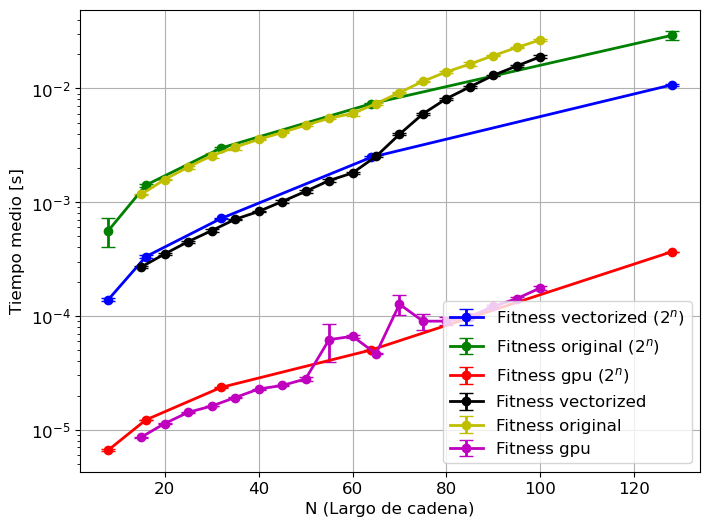

In [79]:

# Load the CSV file
csv_file = "comparing_functions_for_n.csv"
df = pd.read_csv(csv_file)
df2 = pd.read_csv("comparing_functions_for_2n.csv")

#df = pd.concat([df, df2], ignore_index=True)
df.sort_values(by=['chain_length'], inplace=True)

# Assuming the CSV has columns: 'n', 'fitness', 'mean', 'std'
# Assuming the CSV has columns: 'n', 'fitness', 'mean', 'std'
fitness_values = df['fitness'].unique()
fitness_values = fitness_values[fitness_values != 'optimized']
#fitness_values = fitness_values[fitness_values != 'gpu']

plt.figure(figsize=(8, 6))

for fitness in fitness_values:
    subset = df2[df2['fitness'] == fitness]
    n = subset['chain_length']
    mean = subset['mean_time']
    std = subset['std']
    plt.errorbar(n, mean, yerr=std, fmt='o-', label=f'Fitness {fitness} ($2^n$)', capsize=5)

# Plot for each fitness value
for fitness in fitness_values:
    subset = df[df['fitness'] == fitness]
    n = subset['chain_length']
    mean = subset['mean_time']
    std = subset['std']
    plt.errorbar(n, mean, yerr=std, fmt='o-', label=f'Fitness {fitness}', capsize=5)



# # Load the CSV file
# csv_file = "comparing_functions_for_n_atom.csv"
# df = pd.read_csv(csv_file)


# # Plot for each fitness value
# for fitness in fitness_values:
#     subset = df[df['fitness'] == fitness]
#     n = subset['chain_length']
#     mean = subset['mean_time']
#     std = subset['std']
#     plt.errorbar(n, mean, yerr=std, fmt='o-', label=f'Fitness atom {fitness}', capsize=5)

plt.xlabel('N (Largo de cadena)')
plt.ylabel('Tiempo medio [s]')
plt.yscale('log', base=10)
#plt.xscale('log', base=2)
#plt.title('Errorbar Plots for Different Fitness Values')
plt.legend()
plt.grid(True)
plt.show()


In [97]:
dimensions = [64] 
thread_numbers = [1,2,4,8,16,32]
computers = ['jupiterace','atom']
fitness_functions = ['vectorizada2','original','original2','gpu']
population_sizes = [512,1024,2048,4096]
results_dataframe = pd.DataFrame(columns=['computer',
                                          'fitness_function', 
                                          'population_size', 
                                          'thread_number', 
                                          'dimension', 
                                          'total_time_mean',
                                          'total_time_std',
                                          'max_memory_increment_mean',
                                          'max_memory_increment_std',
                                          'min_memory_mean',
                                          'min_memory_std',
                                          'max_memory_mean',
                                          'max_memory_std',
                                          'total_time_fitness',
                                          'cumulative_time_fitness'])

for computer in computers:
    for fitness_function in fitness_functions:
        if fitness_function == 'vectorizada2':
            thread_numbers = [1,2,4,8,16,32]
        elif fitness_function == 'gpu':
            thread_numbers = [1,2,8,32]
        else:
            thread_numbers = [1]
        for population_size in population_sizes:
            for thread_number in thread_numbers:
                for dimension in dimensions:
                    # Define the parent directory containing subdirectories
                    dir_path = f"../../paralela_resultados_{computer}/{fitness_function}/n{dimension}_ps{population_size}_{thread_number}t_{computer[0].upper()}"
                    
                    if not os.path.exists(dir_path):
                        print(f"Warning: {dir_path} does not exist.")
                        continue
                    
                    prof_files = [f for f in os.listdir(dir_path) if f.endswith(".prof")]
                    summary_files = [f for f in os.listdir(dir_path) if f.__contains__("summary")]

                    if len(prof_files) != 1:
                        print(f"Skipping {dir_path}: expected one .prof file, found {len(prof_files)}.")
                        continue
                    if len(summary_files) != 1:
                        print(f"Skipping {dir_path}: expected one summary file, found {len(summary_files)}.")
                        continue

                    prof_file = os.path.join(dir_path, prof_files[0])
                    summary_file = os.path.join(dir_path, summary_files[0])
                    
                    # Read the summary CSV file to define variables
                    summary_df = pd.read_csv(summary_file)

                    total_time_mean = summary_df['total_time_mean'].values[0]
                    total_time_std = summary_df['total_time_std'].values[0]
                    max_memory_increment_mean = summary_df['max_memory_increment_mean'].values[0]
                    max_memory_increment_std = summary_df['max_memory_increment_std'].values[0]
                    min_memory_mean = summary_df['min_memory_mean'].values[0]
                    min_memory_std = summary_df['min_memory_std'].values[0]
                    max_memory_mean = summary_df['max_memory_mean'].values[0]
                    max_memory_std = summary_df['max_memory_std'].values[0]

                    # # Load profile stats
                    # stats = pstats.Stats(prof_file)

                    # # Get fitness function stats
                    # function_names = [func for func in stats.stats.keys() if "reward_based_fitness" in func[2]]
                    # func_stats = stats.stats[function_names[0]]
                    # ncalls, nprimitive, total_time, cumulative_time, callers = func_stats

                    # cumulative_time_fitness = cumulative_time/ncalls
                    # total_time_fitness = total_time/ncalls

                    row = {
                        'computer': computer,
                        'fitness_function': fitness_function,
                        'population_size': population_size,
                        'thread_number': thread_number,
                        'dimension': dimension,
                        'total_time_mean': total_time_mean,
                        'total_time_std': total_time_std,
                        'max_memory_increment_mean': max_memory_increment_mean,
                        'max_memory_increment_std': max_memory_increment_std,
                        'min_memory_mean': min_memory_mean,
                        'min_memory_std': min_memory_std,
                        'max_memory_mean': max_memory_mean,
                        'max_memory_std': max_memory_std,
                        # 'total_time_fitness': total_time_fitness,
                        # 'cumulative_time_fitness': cumulative_time_fitness
                    }

                    results_dataframe = pd.concat([results_dataframe, pd.DataFrame([row])], ignore_index=True)



/tmp/ipykernel_586816/3628708256.py:94: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_dataframe = pd.concat([results_dataframe, pd.DataFrame([row])], ignore_index=True)


Skipping ../../paralela_resultados_jupiterace/vectorizada2/n64_ps512_32t_J: expected one .prof file, found 0.
Skipping ../../paralela_resultados_jupiterace/vectorizada2/n64_ps1024_32t_J: expected one .prof file, found 0.
Skipping ../../paralela_resultados_jupiterace/vectorizada2/n64_ps2048_32t_J: expected one .prof file, found 0.
Skipping ../../paralela_resultados_jupiterace/vectorizada2/n64_ps4096_32t_J: expected one .prof file, found 0.


In [98]:
print(results_dataframe[results_dataframe['computer'] == 'atom'])

   computer fitness_function population_size thread_number dimension  \
43     atom     vectorizada2             512             1        64   
44     atom     vectorizada2             512             2        64   
45     atom     vectorizada2             512             4        64   
46     atom     vectorizada2             512             8        64   
47     atom     vectorizada2             512            16        64   
48     atom     vectorizada2             512            32        64   
49     atom     vectorizada2            1024             1        64   
50     atom     vectorizada2            1024             2        64   
51     atom     vectorizada2            1024             4        64   
52     atom     vectorizada2            1024             8        64   
53     atom     vectorizada2            1024            16        64   
54     atom     vectorizada2            1024            32        64   
55     atom     vectorizada2            2048             1      

Text(0, 0.5, 'Tiempo Medio Total [s]')

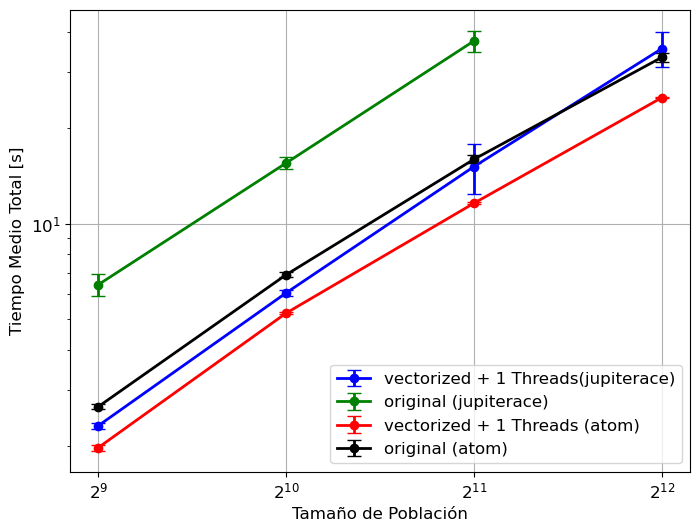

In [100]:
dimension = 64
computer = 'jupiterace'
thread_numbers = [1]

df_jupiterace = results_dataframe[(results_dataframe['computer'] == computer) & (results_dataframe['dimension'] == dimension)]

plt.figure(figsize=(8, 6))

for nthreads in thread_numbers:
    df_jupiterace_vectorizada = df_jupiterace[df_jupiterace['fitness_function'] == 'vectorizada2']
    df = df_jupiterace_vectorizada[df_jupiterace_vectorizada['thread_number'] == nthreads]
    df = df.sort_values(by='population_size')
    plt.errorbar(df['population_size'], df['total_time_mean'], yerr=df['total_time_std'], fmt='o-', label=f'vectorized + {nthreads} Threads(jupiterace)', capsize=5)
df_jupiterace_original = df_jupiterace[df_jupiterace['fitness_function'] == 'original2']
plt.errorbar(df_jupiterace_original['population_size'], df_jupiterace_original['total_time_mean'], yerr=df_jupiterace_original['total_time_std'], fmt='o-', label='original (jupiterace)', capsize=5)

# for nthreads in thread_numbers:
#     df_jupiterace_gpu = df_jupiterace[(df_jupiterace['fitness_function'] == 'gpu') & (df_jupiterace['thread_number'] == nthreads)]
#     df_jupiterace_gpu = df_jupiterace_gpu.sort_values(by='population_size')
#     plt.errorbar(df_jupiterace_gpu['population_size'], df_jupiterace_gpu['total_time_mean'], yerr=df_jupiterace_gpu['total_time_std'], fmt='o-', label=f'gpu + {nthreads}', capsize=5)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
dimension = 64
computer = 'atom'

df_atom = results_dataframe[(results_dataframe['computer'] == computer) & (results_dataframe['dimension'] == dimension)]


for nthreads in thread_numbers:
    df_atom_vectorizada = df_atom[df_atom['fitness_function'] == 'vectorizada2']
    df = df_atom_vectorizada[df_atom_vectorizada['thread_number'] == nthreads]
    df = df.sort_values(by='population_size')
    plt.errorbar(df['population_size'], df['total_time_mean'], yerr=df['total_time_std'], fmt='o-', label=f'vectorized + {nthreads} Threads (atom)', capsize=5)
df_atom_original = df_atom[df_atom['fitness_function'] == 'original']
plt.errorbar(df_atom_original['population_size'], df_atom_original['total_time_mean']*(3/5), yerr=df_atom_original['total_time_std'], fmt='o-', label='original (atom)', capsize=5)

# for nthreads in thread_numbers:
#     df_atom_gpu = df_atom[(df_atom['fitness_function'] == 'gpu') & (df_atom['thread_number'] == nthreads)]
#     df_atom_gpu = df_atom_gpu.sort_values(by='population_size')
#     plt.errorbar(df_atom_gpu['population_size'], df_atom_gpu['total_time_mean'], yerr=df_atom_gpu['total_time_std'], fmt='o-', label=f'gpu + {nthreads}', capsize=5)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


plt.legend()
#plt.title('jupiterace')
plt.grid(True)
plt.yscale('log')
plt.xscale('log',base = 2)
plt.xlabel('Tamaño de Población')
plt.ylabel('Tiempo Medio Total [s]')





Text(0, 0.5, 'Tiempo Medio [s]')

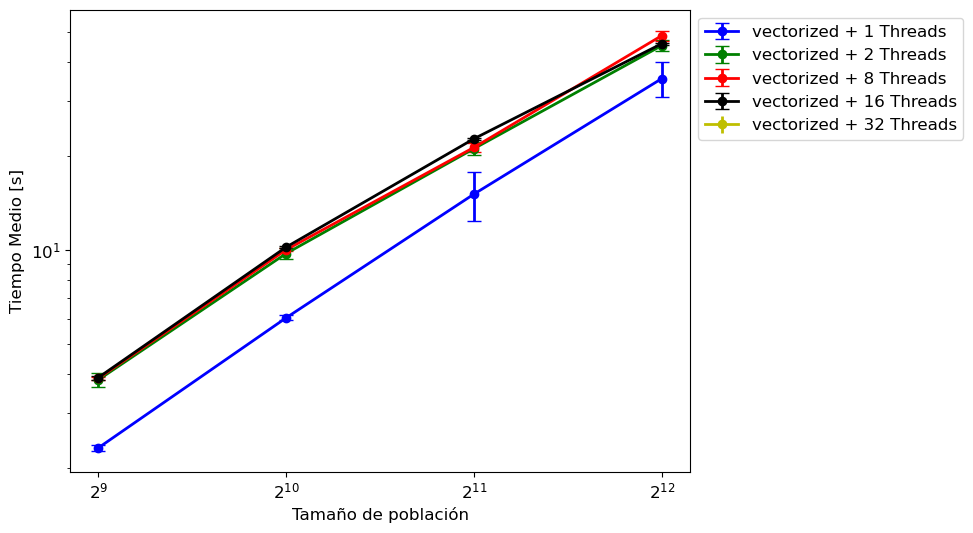

In [83]:
dimension = 64
computer = 'jupiterace'
thread_numbers = [1,2,8,16,32]

df_jupiterace = results_dataframe[(results_dataframe['computer'] == computer) & (results_dataframe['dimension'] == dimension)]

plt.figure(figsize=(8, 6))

for nthreads in thread_numbers:
    df_jupiterace_vectorizada = df_jupiterace[df_jupiterace['fitness_function'] == 'vectorizada2']
    df = df_jupiterace_vectorizada[df_jupiterace_vectorizada['thread_number'] == nthreads]
    df = df.sort_values(by='population_size')
    plt.errorbar(df['population_size'], df['total_time_mean'], yerr=df['total_time_std'], fmt='o-', label=f'vectorized + {nthreads} Threads', capsize=5)
# df_jupiterace_original = df_jupiterace[df_jupiterace['fitness_function'] == 'original']
# plt.errorbar(df_jupiterace_original['population_size'], df_jupiterace_original['total_time_mean'], yerr=df_jupiterace_original['total_time_std'], fmt='o-', label='original', capsize=5)

# for nthreads in thread_numbers:
#     df_jupiterace_gpu = df_jupiterace[(df_jupiterace['fitness_function'] == 'gpu') & (df_jupiterace['thread_number'] == nthreads)]
#     df_jupiterace_gpu = df_jupiterace_gpu.sort_values(by='population_size')
#     plt.errorbar(df_jupiterace_gpu['population_size'], df_jupiterace_gpu['total_time_mean'], yerr=df_jupiterace_gpu['total_time_std'], fmt='o-', label=f'gpu + {nthreads}', capsize=5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.yscale('log')
plt.xscale('log',base = 2)
plt.xlabel('Tamaño de población')
plt.ylabel('Tiempo Medio [s]')



Text(0, 0.5, 'Total Time')

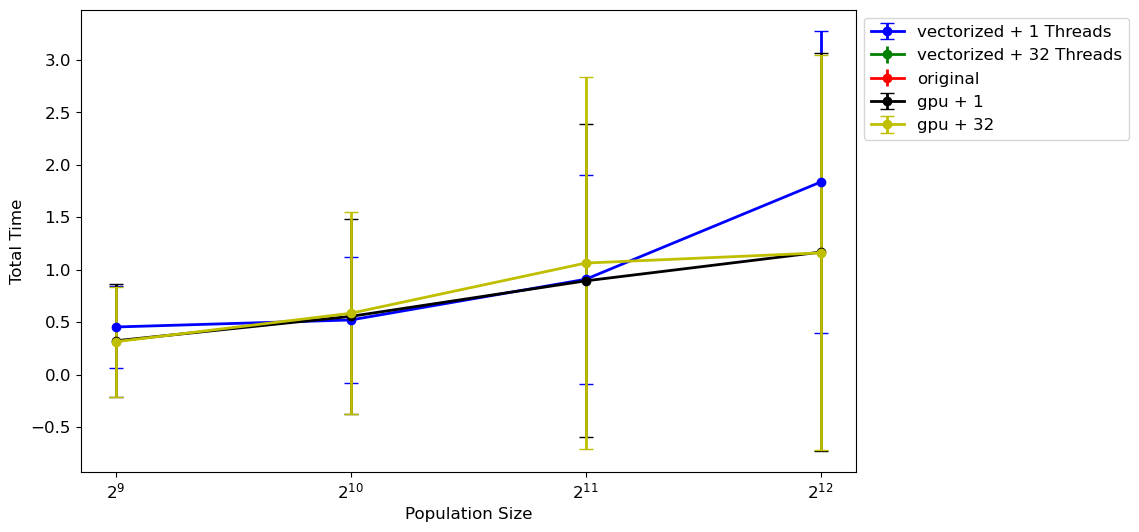

In [84]:
dimension = 64
computer = 'jupiterace'
thread_numbers = [1,32]
df_jupiterace = results_dataframe[(results_dataframe['computer'] == computer) & (results_dataframe['dimension'] == dimension)]

plt.figure(figsize=(10, 6))

for nthreads in thread_numbers:
    df_jupiterace_vectorizada2 = df_jupiterace[df_jupiterace['fitness_function'] == 'vectorizada2']
    df = df_jupiterace_vectorizada2[df_jupiterace_vectorizada2['thread_number'] == nthreads]
    df = df.sort_values(by='population_size')
    plt.errorbar(df['population_size'], df['max_memory_increment_mean'], yerr=df['max_memory_increment_std'], fmt='o-', label=f'vectorized + {nthreads} Threads', capsize=5)

df_jupiterace_original = df_jupiterace[df_jupiterace['fitness_function'] == 'original']
plt.errorbar(df_jupiterace_original['population_size'], df_jupiterace_original['max_memory_increment_mean'], yerr=df_jupiterace_original['max_memory_increment_std'], fmt='o-', label='original', capsize=5)

for nthreads in thread_numbers:
    df_jupiterace_gpu = df_jupiterace[(df_jupiterace['fitness_function'] == 'gpu') & (df_jupiterace['thread_number'] == nthreads)]
    df_jupiterace_gpu = df_jupiterace_gpu.sort_values(by='population_size')
    plt.errorbar(df_jupiterace_gpu['population_size'], df_jupiterace_gpu['max_memory_increment_mean'], yerr=df_jupiterace_gpu['max_memory_increment_std'], fmt='o-', label=f'gpu + {nthreads}', capsize=5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.yscale('log')
plt.xscale('log',base = 2)
plt.xlabel('Population Size')
plt.ylabel('Total Time')



Text(0, 0.5, 'Total Time')

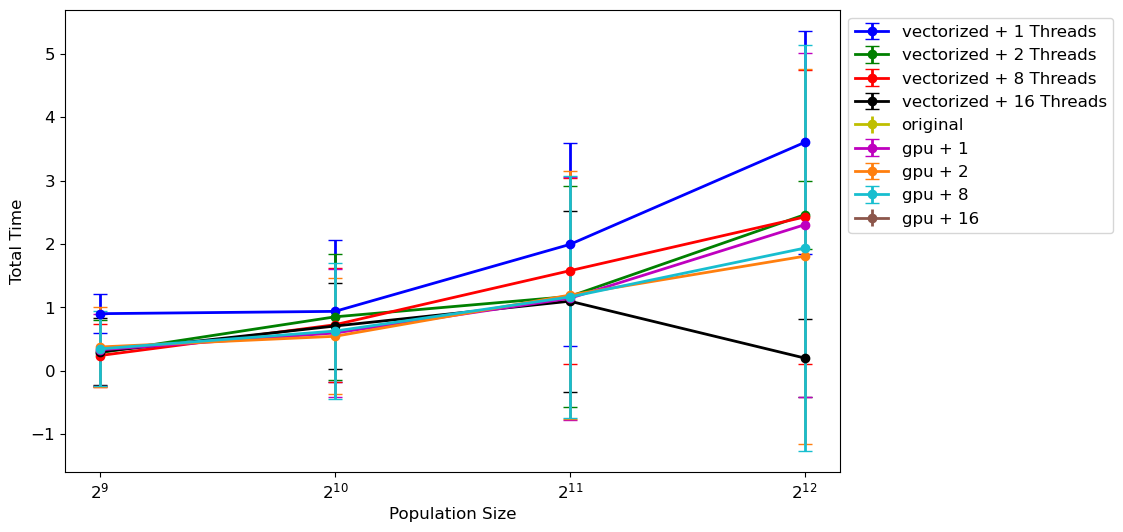

In [85]:
dimension = 64
computer = 'atom'
thread_numbers = [1,2,8,16]
df_atom = results_dataframe[(results_dataframe['computer'] == computer) & (results_dataframe['dimension'] == dimension)]

plt.figure(figsize=(10, 6))

for nthreads in thread_numbers:
    df_atom_vectorizada2 = df_atom[df_atom['fitness_function'] == 'vectorizada2']
    df = df_atom_vectorizada2[df_atom_vectorizada2['thread_number'] == nthreads]
    df = df.sort_values(by='population_size')
    plt.errorbar(df['population_size'], df['max_memory_increment_mean'], yerr=df['max_memory_increment_std'], fmt='o-', label=f'vectorized + {nthreads} Threads', capsize=5)
df_atom_original = df_atom[df_atom['fitness_function'] == 'original']
plt.errorbar(df_atom_original['population_size'], df_atom_original['max_memory_increment_mean'], yerr=df_atom_original['max_memory_increment_std'], fmt='o-', label='original', capsize=5)

for nthreads in thread_numbers:
    df_atom_gpu = df_atom[(df_atom['fitness_function'] == 'gpu') & (df_atom['thread_number'] == nthreads)]
    df_atom_gpu = df_atom_gpu.sort_values(by='population_size')
    plt.errorbar(df_atom_gpu['population_size'], df_atom_gpu['max_memory_increment_mean'], yerr=df_atom_gpu['max_memory_increment_std'], fmt='o-', label=f'gpu + {nthreads}', capsize=5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.yscale('log')
plt.xscale('log',base = 2)
plt.xlabel('Population Size')
plt.ylabel('Total Time')



Text(0, 0.5, 'Total Time')

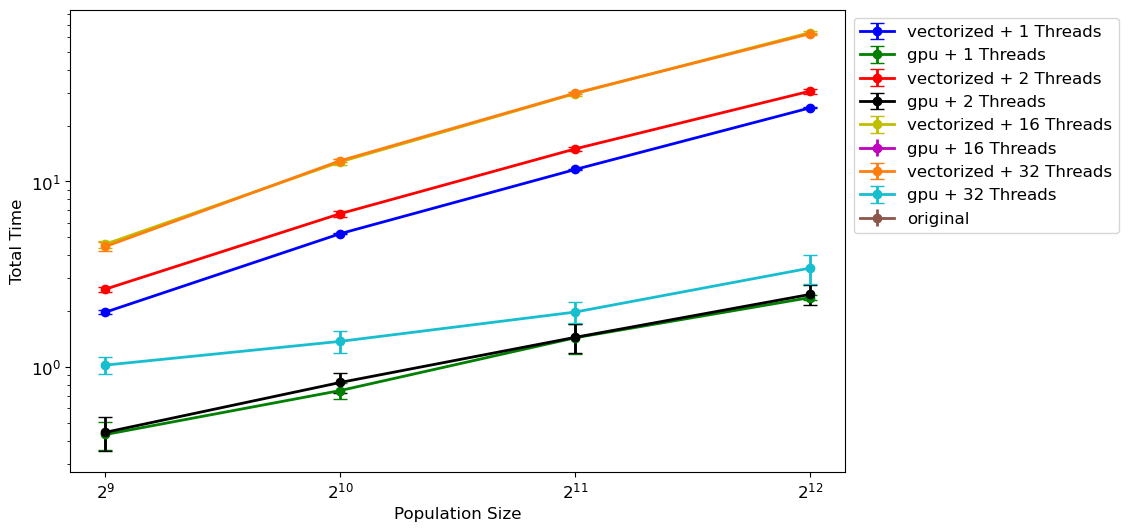

In [86]:
dimension = 64
computer = 'atom'
thread_numbers = [1,2,16,32]
df_atom = results_dataframe[(results_dataframe['computer'] == computer) & (results_dataframe['dimension'] == dimension)]

plt.figure(figsize=(10, 6))

for nthreads in thread_numbers:
    df_atom_vectorizada2 = df_atom[df_atom['fitness_function'] == 'vectorizada2']
    df = df_atom_vectorizada2[df_atom_vectorizada2['thread_number'] == nthreads]
    df = df.sort_values(by='population_size')
    plt.errorbar(df['population_size'], df['total_time_mean'], yerr=df['total_time_std'], fmt='o-', label=f'vectorized + {nthreads} Threads', capsize=5)

    df_atom_gpu = df_atom[df_atom['fitness_function'] == 'gpu']
    df = df_atom_gpu[df_atom_gpu['thread_number'] == nthreads]
    df = df.sort_values(by='population_size')
    plt.errorbar(df['population_size'], df['total_time_mean'], yerr=df['total_time_std'], fmt='o-', label=f'gpu + {nthreads} Threads', capsize=5)

df_atom_original = df_atom[df_atom['fitness_function'] == 'original']
plt.errorbar(df_atom_original['population_size'], df_atom_original['total_time_mean'], yerr=df_atom_original['total_time_std'], fmt='o-', label='original', capsize=5)


plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.yscale('log')
plt.xscale('log',base = 2)
plt.xlabel('Population Size')
plt.ylabel('Total Time')



In [87]:
dimension = 128
computer = 'atom'
thread_numbers = [1,8,32]

df_atom = results_dataframe[(results_dataframe['computer'] == computer) & (results_dataframe['dimension'] == dimension)]

plt.figure(figsize=(10, 6))

for nthreads in thread_numbers:
    df_atom_vectorizada = df_atom[df_atom['fitness_function'] == 'vectorizada2']
    df = df_atom_vectorizada[df_atom_vectorizada['thread_number'] == nthreads]
    df = df.sort_values(by='population_size')
    plt.errorbar(df['population_size'], df['total_time_mean'], yerr=df['total_time_std'], fmt='o-', label=f'vectorized + {nthreads} Threads', capsize=5)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.yscale('log')
plt.xscale('log',base = 2)
plt.xlabel('Population Size')
plt.ylabel('Total Time')


Text(0, 0.5, 'Total Time')

Error in callback <function _draw_all_if_interactive at 0x7f8e91226de0> (for post_execute), with arguments args (),kwargs {}:


ValueError: Data has no positive values, and therefore cannot be log-scaled.

ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 1000x600 with 1 Axes>